**簡易爬蟲撰寫**   
拜訪一下批踢踢實業坊的八卦版(Gossiping)   
https://www.ptt.cc/bbs/index.html  


In [1]:
# 導入module
import requests
from bs4 import BeautifulSoup

In [2]:
# ppt網址
URL = "https://www.ptt.cc/bbs/Gossiping/index.html"
#URL = "https://www.ptt.cc/bbs/NBA/index.html"

補充知識：Python 初學第九講 — 字典(Dictionary)   
https://medium.com/ccclub/ccclub-python-for-beginners-tutorial-533b8d8d96f3

In [3]:
movie = {'name':'Saving Private Ryan', #電影名稱
         'year':1998, #電影上映年份
         'director':'Steven Spielberg',#導演
         'Writer': 'Robert Rodat', #編劇
         'Stars':['Tom Hanks', 'Matt Damon', 'Tom Sizemore'],#明星
         'Oscar ':['Best Director','Best Cinematography','Best Sound','Best Film Editing','Best Effects, Sound Effects Editing']
         #獲得的奧斯卡獎項
        }

In [4]:
print(movie['director'])
#表示這部電影的導演為史蒂芬史匹柏

Steven Spielberg


In [5]:
# 設定Header與Cookie
my_headers = {'cookie': 'over18=1'}

停一下想想，cookie與over18=1在哪裡?

In [8]:
#抓取網頁的HTML資料
myresult = requests.get(URL, headers = my_headers)

<Response [200]>

想一下，requests.get()抓回什麼內容?

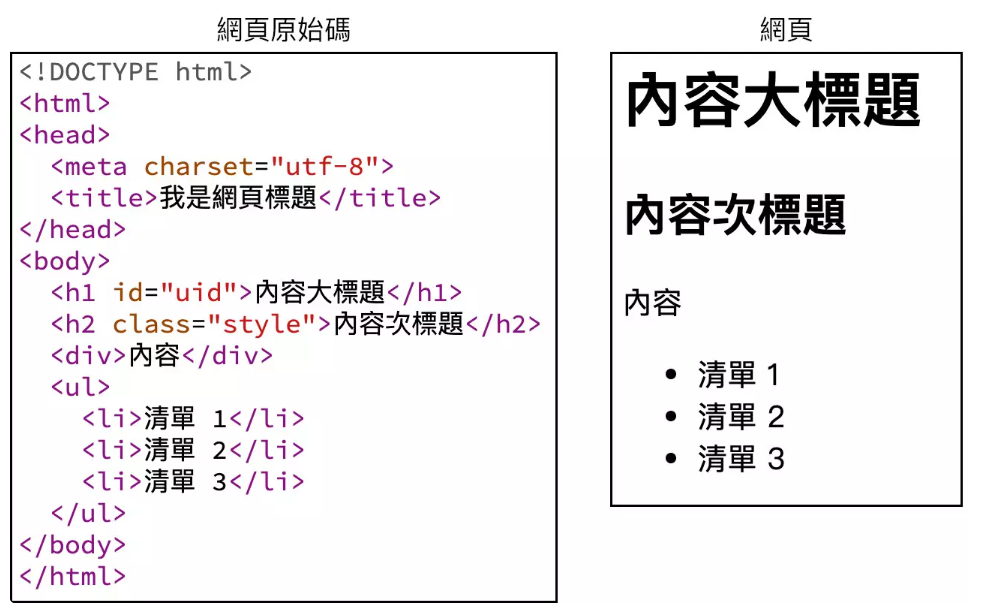

In [ ]:
print(myresult.text)

In [12]:
print(myresult.status_code)

200


In [14]:
#透過BeautifulSoup的剖析器(html.parser)建立標籤樹
mysoup = BeautifulSoup(myresult.text,"html.parser")

該網頁源碼所對應的標籤樹如下圖：  
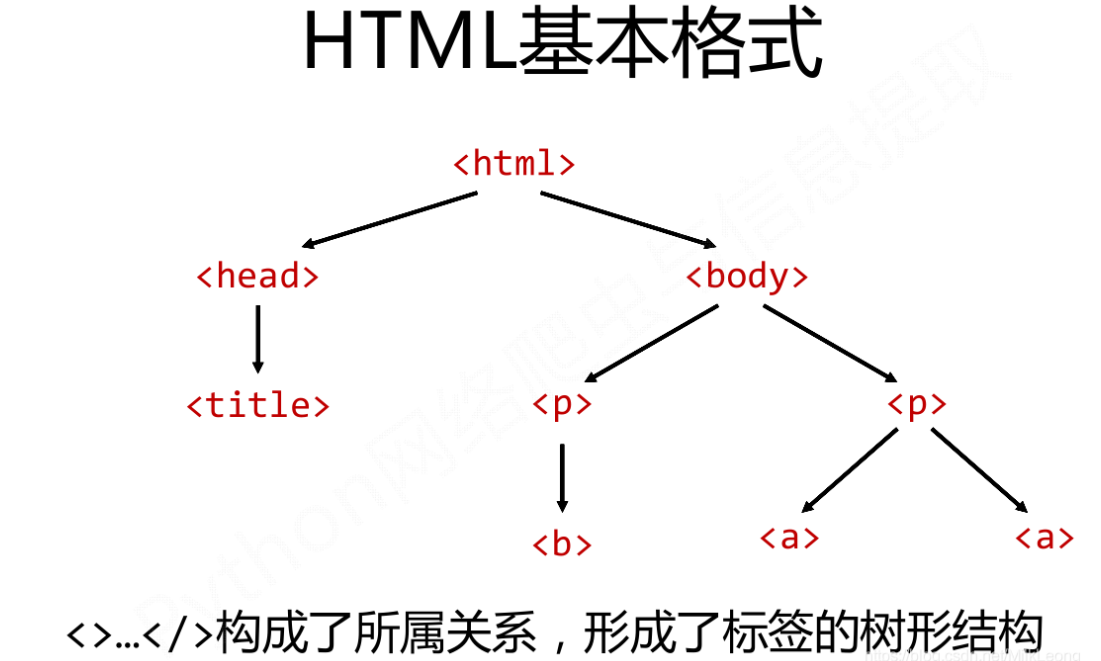

In [17]:
mysoup

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>看板 Gossiping 文章列表 - 批踢踢實業坊</title>
<link href="//images.ptt.cc/bbs/v2.27/bbs-common.css" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.27/bbs-custom.css" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print" rel="stylesheet" type="text/css"/>
</head>
<body>
<div id="topbar-container">
<div class="bbs-content" id="topbar">
<a href="/bbs/" id="logo">批踢踢實業坊</a>
<span>›</span>
<a class="board" href="/bbs/Gossiping/index.html"><span class="board-label">看板 </span>Gossiping</a>
<a class="right small" href="/about.html">關於我們</a>
<a class="right small" href="/contact.html">聯絡資訊</a>
</div>
</d

In [21]:
mytitles = mysoup.select('.title a')
href = mysoup.select('.title a')
#mytitles = mysoup.find_all('div', 'title') #mysoup.find_all('div', class_='title')
#len(titles)
for t in mytitles:
    print(t.text)

[<a href="/bbs/Gossiping/M.1698723014.A.6AF.html">[爆卦] 呱吉：藍白合能解決民主獨裁？</a>,
 <a href="/bbs/Gossiping/M.1698723021.A.078.html">Re: [問卦] 英文不好可以進入外商工作嗎？</a>,
 <a href="/bbs/Gossiping/M.1698723023.A.619.html">[問卦] 哲學系畢業可以幹嘛？？</a>,
 <a href="/bbs/Gossiping/M.1698723186.A.C0A.html">Re: [新聞] 建案損鄰7戶、受災屋塌還被告 住戶求助無</a>,
 <a href="/bbs/Gossiping/M.1698723257.A.337.html">[問卦] 幣安USDT的apr怎麼那麽高？</a>,
 <a href="/bbs/Gossiping/M.1698723307.A.696.html">[新聞] 徐春鶯引爭議 王定宇：參選立委都要放棄</a>,
 <a href="/bbs/Gossiping/M.1698723342.A.A7F.html">Re: [問卦] 現在月薪65k  算高薪還低薪？</a>,
 <a href="/bbs/Gossiping/M.1698723344.A.C06.html">Re: [問卦] 英文不好可以進入外商工作嗎？</a>,
 <a href="/bbs/Gossiping/M.1698723368.A.83E.html">[問卦] 謝霆鋒新造型像流浪漢?</a>,
 <a href="/bbs/Gossiping/M.1698723408.A.C20.html">Re: [問卦] 英文不好可以進入外商工作嗎？</a>,
 <a href="/bbs/Gossiping/M.1698723464.A.EC2.html">[問卦] 你的人生曾被小奶迷惑然後走回正途嗎???</a>,
 <a href="/bbs/Gossiping/M.1698723510.A.B8E.html">[問卦] 文組年薪80萬，算及格嗎= =....?</a>,
 <a href="/bbs/Gossiping/M.1698723539.A.C2D.html">[新聞] 學者看民

In [ ]:
"""
import pandas as pd
data = []
for t in mytitles:
  data.append(t.text)

df = pd.DataFrame(data, columns=['title'])
"""

"\nimport pandas as pd\ndata = []\nfor t in mytitles:\n  data.append(t.text)\n\ndf = pd.DataFrame(data, columns=['title'])\n"

In [22]:
import pandas as pd
data = []
href_link = []

for t in mytitles:
  data.append(t.text)

for x in href:
  href_link.append('https://www.ptt.cc' + x['href'])

df = pd.DataFrame(data, columns=['title'])
df['href_link'] = href_link

In [23]:
df

,title,href_link
0,[爆卦] 呱吉：藍白合能解決民主獨裁？,https://www.ptt.cc/bbs/Gossiping/M.1698723014....
1,Re: [問卦] 英文不好可以進入外商工作嗎？,https://www.ptt.cc/bbs/Gossiping/M.1698723021....
2,[問卦] 哲學系畢業可以幹嘛？？,https://www.ptt.cc/bbs/Gossiping/M.1698723023....
3,Re: [新聞] 建案損鄰7戶、受災屋塌還被告 住戶求助無,https://www.ptt.cc/bbs/Gossiping/M.1698723186....
4,[問卦] 幣安USDT的apr怎麼那麽高？,https://www.ptt.cc/bbs/Gossiping/M.1698723257....
5,[新聞] 徐春鶯引爭議 王定宇：參選立委都要放棄,https://www.ptt.cc/bbs/Gossiping/M.1698723307....
6,Re: [問卦] 現在月薪65k 算高薪還低薪？,https://www.ptt.cc/bbs/Gossiping/M.1698723342....
7,Re: [問卦] 英文不好可以進入外商工作嗎？,https://www.ptt.cc/bbs/Gossiping/M.1698723344....
8,[問卦] 謝霆鋒新造型像流浪漢?,https://www.ptt.cc/bbs/Gossiping/M.1698723368....
9,Re: [問卦] 英文不好可以進入外商工作嗎？,https://www.ptt.cc/bbs/Gossiping/M.1698723408....
